# CHE1147 Data Mining in Engineering
### Assignment 4 Jialin Shang 1005086256
## 3. A PAT Application
In 2004, the Food and Drug Administration (FDA) released a guidance to encourage innova-
tion in pharmaceutical development, manufacturing and quality assurance. The framework,
called Process Analytical Technology (PAT), combines MultiVariate Data Analysis (MVDA),
Design of Experiments (DoE) and process analytical chemistry methods such as UV, IR, NIR,
NMR (fast, precise, online and preferably non-invasive methods).
Here, we use PCA and PLS, two classic MVDA approaches to assess the feasibility of
using NIR to measure a critical quality component of a wood product, the composition of
wood fiber. In the first part, we will perform unsupervised data exploration with PCA. In
the second part, we will run PLS, a supervised learning algorithm, to quantify the outputs
of interest (i.e. wood composition).

### 3.1 Description of the process
Sawdust from industrial sawing of birch, pine and spruce is mixed at different ratios to
manufacture a final wood product. The NIR spectra for 15 samples of known composition
of the three different types of wood were used to train the model. Each sample was tested
twice (resulting in 30 rows) and NIR spectra data was collected in the range between 1100-
2300 nm. Thus, the input X-table is (30 rows)x(1201 columns) and the output Y-table
is (30 rows)x(3 columns), where the three outputs/compositions are recorded as percent
proportion of spruce, pine and birch. Data for the training of the model are in the file
sawdust train.xlsx
In order to assess the accuracy of the model developed, we have a test data set of NIR
data (X) and proportions Y different than the training data set. The test data set is not
”seen” by the model during training. The proportions in the test set were selected to be
different than those in the train set to assess the predictive power of the model under realistic
conditions. There were 12 samples measured twice, therefore the number of rows in the X
and Y-tables is 24. The test data are in the file sawdust pred.xlsx

### 3.2 Task #1: Unsupervised learning, PCA of NIR data
A. Generate the plot of all the training set raw NIR data.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import MaxAbsScaler, StandardScaler 
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.ticker import MaxNLocator
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression

In [2]:
# Import dataset
t = pd.read_excel('sawdust_train.xlsx', index_col = 'Primary ID')
# Drop the columns and reindex
t.drop(["OBSNAM","Spruce","Pine","Birch"], axis = 1, inplace = True)
t.head()

,w1100,w1101,w1102,w1103,w1104,w1105,w1106,w1107,w1108,w1109,...,w2291,w2292,w2293,w2294,w2295,w2296,w2297,w2298,w2299,w2300
Primary ID,,,,,,,,,,,,,,,,,,,,,
1,1.83444,1.83416,1.83350,1.83237,1.83084,1.82910,1.82742,1.82611,1.82516,1.82452,...,0.554586,0.559044,0.563587,0.568213,0.572867,0.577625,0.582679,0.587850,0.593058,0.598025
2,1.82992,1.82965,1.82902,1.82800,1.82667,1.82501,1.82347,1.82225,1.82135,1.82070,...,0.551910,0.556829,0.561744,0.566549,0.571178,0.575774,0.580471,0.585226,0.589929,0.594470
5,1.84602,1.84569,1.84522,1.84431,1.84311,1.84172,1.84035,1.83918,1.83834,1.83773,...,0.547198,0.552090,0.557003,0.561938,0.566829,0.571796,0.577128,0.582482,0.587653,0.592419
6,1.84556,1.84514,1.84444,1.84340,1.84206,1.84054,1.83912,1.83795,1.83714,1.83658,...,0.547984,0.553266,0.558515,0.563561,0.568268,0.572794,0.577536,0.582409,0.587451,0.592277
9,1.83770,1.83723,1.83646,1.83532,1.83385,1.83222,1.83070,1.82958,1.82862,1.82806,...,0.547705,0.552726,0.557880,0.563027,0.567910,0.572684,0.577522,0.582369,0.587133,0.591635


Text(0, 0.5, 'Signal')

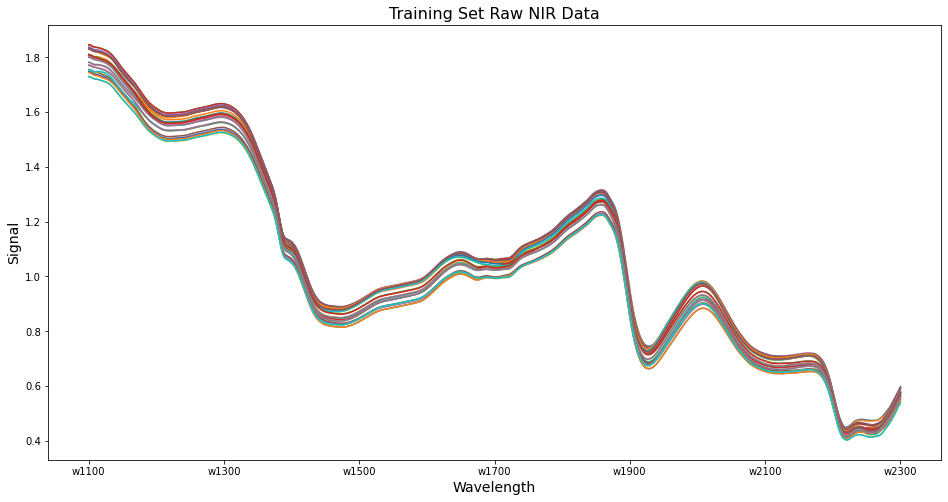

In [3]:
# Generate the plot of all the training set raw NIR data
t.transpose().plot(figsize = (16,8), legend = None)
plt.title('Training Set Raw NIR Data', fontsize = 16)
plt.xlabel('Wavelength', fontsize = 14)
plt.ylabel('Signal', fontsize = 14)

B. Pre-process the NIR data and perform PCA for 5 components.

In [4]:
# Scale the data
scaler = StandardScaler()
scaled_t = scaler.fit_transform(t)
# Perform PCA for 5 components
pca = PCA(n_components = 5, svd_solver = 'full')
pca_scores = pca.fit_transform(scaled_t)

In [5]:
# Extract the scores
scores_t = pd.DataFrame(data = pca_scores, columns = ['PC1', 'PC2', 'PC3','PC4','PC5'], index = t.index)
scores_t

,PC1,PC2,PC3,PC4,PC5
Primary ID,,,,,
1,-42.268493,-4.040753,12.305789,-0.216578,0.168393
2,-36.354122,-4.346712,11.761122,-1.134579,-0.087849
5,-37.057664,-10.544641,-2.211747,0.989693,-0.906091
6,-37.052219,-10.376199,-1.876075,1.068672,-1.039932
9,-44.838660,-1.286436,3.611384,-1.353460,-0.279127
10,-41.555269,-0.534161,3.624322,-1.446707,-0.282848
11,-18.429982,12.203720,1.642649,4.719164,-0.115531
12,-20.471809,11.998962,2.013402,4.495532,-0.173509
17,3.330350,-9.772481,-1.652964,2.157331,0.000344


In [6]:
# Extract the loadings
loadings_t = pd.DataFrame(data = pca.components_.T, columns = ['PC1', 'PC2', 'PC3','PC4','PC5'], index = t.columns)
loadings_t

,PC1,PC2,PC3,PC4,PC5
w1100,-0.025512,-0.056479,-0.013096,-0.036032,0.018883
w1101,-0.025549,-0.056289,-0.012954,-0.035982,0.015580
w1102,-0.025582,-0.056108,-0.012888,-0.036273,0.012370
w1103,-0.025602,-0.055994,-0.012859,-0.036626,0.010389
w1104,-0.025608,-0.055937,-0.012931,-0.037125,0.009627
...,...,...,...,...,...
w2296,-0.028606,-0.019799,0.037978,0.084075,-0.071664
w2297,-0.028608,-0.019760,0.037446,0.086592,-0.067330
w2298,-0.028594,-0.019730,0.037271,0.089208,-0.064559
w2299,-0.028561,-0.019801,0.037263,0.091904,-0.067460


C. Plot the cumulative explained variance versus the number of components. How many
components do we need to capture 99% of the variance?

Text(0, 0.5, 'Cumulative Explained Variance')

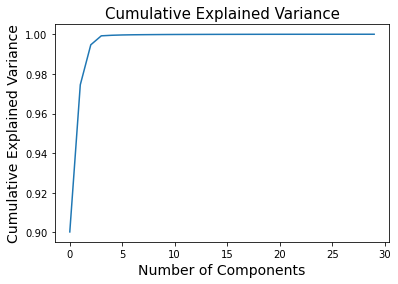

In [7]:
# Plot the cumulative explained variance versus the number of components
pca = PCA().fit(scaled_t)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative Explained Variance', fontsize = 15)
plt.xlabel('Number of Components', fontsize = 14)
plt.ylabel('Cumulative Explained Variance', fontsize = 14)

In [8]:
# Construct a for-loop to find the number of components
number_conponents = 5
for n in range(number_conponents):
  if sum(pca.explained_variance_ratio_[ : n]) > 0.99:
    break

print(n)
print('We need 3 components to find 99% of the variance')

3
We need 3 components to find 99% of the variance


D. Plot the PCA scores for the first two components. Comment on any outliers, trends,
clusters etc (if any).

In [ ]:
def myplot_scores(scores, score_labels = None):
    # adjusting the scores to fit in (-1,1)
    xt = scores[:,0]
    yt = scores[:,1]
    
    scalext = 1.0/(xt.max() - xt.min())
    scaleyt = 1.0/(yt.max() - yt.min())
    
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt
    
    for (x,y), label in zip(np.vstack((xt_scaled, yt_scaled)).T, score_labels):
        plt.text(x, y, label, ha = 'center', size = 13)

    plt.hlines(0, -1, 1, linestyles = 'dashed', linewidth = 3)
    plt.vlines(0, -1, 1, linestyles = 'dashed', linewidth = 3)

    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=20);
    plt.ylabel("PC{}".format(2), fontsize=20);
    plt.tick_params(labelsize=16)
    plt.grid()

fig = plt.figure(figsize = (10, 10))
myplot_scores(pca_scores[:,:2], score_labels = scores_t.index)

As the points 31 & 32 differ from majority points, they can be considered as outliers. And there might be some cluters such as '17, 18, 21, 22, 29, 30'.

E. Plot the loadings of the first two components and comment on which wavelengths
seem to be important for different PCs. Don’t describe the graphs in words. In two
sentences, describe any significant trends or signals (if any).

In [ ]:
f0 = plt.figure(figsize = (18, 6))

s1 = f0.add_subplot(121)
plt.plot(loadings_t['PC1'], '-')
s1.set_xlabel('Wavelength', fontsize = 14)
s1.set_ylabel('Loading Value', fontsize = 14)
s1.set_title('Loadings of PC #1', fontsize = 14)
s1.xaxis.set_major_locator(MaxNLocator(integer = True))
plt.tick_params(labelsize = 14)

s2 = f0.add_subplot(122)
plt.plot(loadings_t['PC2'], '-')
s2.set_xlabel('Wavelength', fontsize = 14)
s2.set_ylabel('Loading Value', fontsize = 14)
s2.set_title('Loadings of PC #2', fontsize = 14)
s2.xaxis.set_major_locator(MaxNLocator(integer = True))
plt.tick_params(labelsize = 14)

PC1 capture information at around 1150nm to 1400nm and 2200nm to 2300nm. PC2 captures information at around 1400nm to 1700nm and 1850nm to 1950nm and2150nm to 2300nm.

F. Apply the dimensionality reduction with the PCA model you developed in step B for
the test set using the transform method.

In [11]:
# Import dataset
p = pd.read_excel('sawdust_pred.xlsx', index_col = 'Primary ID')
# Drop the columns and reindex
p.drop(["OBSNAM","Spruce","Pine","Birch"], axis = 1, inplace = True)

In [12]:
# Scale the data
scaler = StandardScaler()
scaled_p = scaler.fit_transform(p)
# Perform PCA for 5 components
pca = PCA(n_components = 5, svd_solver = 'full')
pca_scores = pca.fit_transform(scaled_p)

In [13]:
# Extract the scores
scores_p = pd.DataFrame(data = pca_scores, columns = ['PC1', 'PC2', 'PC3','PC4','PC5'], index = p.index)
scores_p

,PC1,PC2,PC3,PC4,PC5
Primary ID,,,,,
3,67.651410,-5.857861,0.279296,0.074246,2.691211
4,66.545221,-4.743130,1.716379,-0.199507,3.259211
7,1.617814,18.187934,-2.720987,-3.081649,0.868411
8,-5.712129,16.958007,-3.435909,-2.764299,1.258268
13,-13.448418,5.179590,3.200313,1.139095,1.955402
14,-18.708518,3.236295,2.093587,1.442881,2.182123
15,40.161304,4.688888,-0.697689,-1.562778,-1.287700
16,44.087812,3.250659,-1.445037,-1.453041,-1.623329
23,-3.554891,6.118894,4.139758,4.422534,-0.782964


In [14]:
# Extract the loadings
loadings_t = pd.DataFrame(data = pca.components_.T, columns = ['PC1', 'PC2', 'PC3','PC4','PC5'], index = t.columns)
loadings_t

,PC1,PC2,PC3,PC4,PC5
w1100,0.028039,0.038207,0.048247,-0.002319,-0.001576
w1101,0.028031,0.038355,0.047965,-0.002777,-0.001234
w1102,0.028036,0.038355,0.047632,-0.003264,-0.001215
w1103,0.028046,0.038299,0.047270,-0.003595,-0.000934
w1104,0.028065,0.038107,0.047012,-0.003747,-0.000341
...,...,...,...,...,...
w2296,0.026081,0.050735,-0.072797,-0.017055,0.058064
w2297,0.026097,0.050275,-0.074333,-0.021984,0.050566
w2298,0.026158,0.049568,-0.075087,-0.026679,0.043994
w2299,0.026189,0.048987,-0.076201,-0.030099,0.040743


G. Create a scatter plot of the scores in PC1, PC2 of all 54 points in the train and test
data set, coloured by the set they belong to (suggestion: use sns.scatterplot). Why is
it important to overlap the scores of both train and test set in one graph? What are
you checking to see?

Text(0, 0.5, 'PC2')

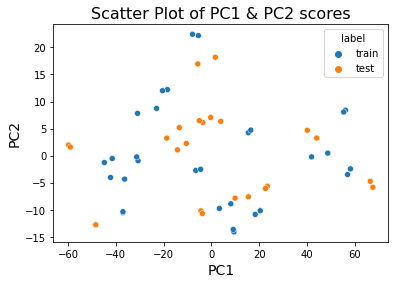

In [20]:
# Train is blue color, test is yellow color
scores_t['label'] = 'train'
scores_p['label'] = 'test'
s = pd.concat([scores_t, scores_p], axis = 0)
sns.scatterplot(data = s, x = 'PC1', y = 'PC2', hue = "label")
plt.title('Scatter Plot of PC1 & PC2 scores', fontsize = 16)
plt.xlabel('PC1', fontsize = 14)
plt.ylabel('PC2', fontsize = 14)

Overlapping both training and test sets in one graph is beneficial for us to check whether the test set is biased or not. We cannot capture the relation of data in the test set if the test set is clustered and far from the training set. As we can see, there is no obvious cluster of training and test sets over PC1 & PC2. 

### 3.3 Task #2: Supervised learning, PLS model
A. Run the PLS regression to model all 3 outputs with the scaled train set spectra.
Increase the number of components to achieve R2 value of at least 0.92 (use PLSRe-
gression’s method score to estimate R2).

In [21]:
# Import training set
train_set = pd.read_excel('sawdust_train.xlsx', index_col = 'Primary ID')
train_set.drop(['OBSNAM'], axis = 1, inplace = True)
train_set

,w1100,w1101,w1102,w1103,w1104,w1105,w1106,w1107,w1108,w1109,...,w2294,w2295,w2296,w2297,w2298,w2299,w2300,Spruce,Pine,Birch
Primary ID,,,,,,,,,,,,,,,,,,,,,
1,1.83444,1.83416,1.83350,1.83237,1.83084,1.82910,1.82742,1.82611,1.82516,1.82452,...,0.568213,0.572867,0.577625,0.582679,0.587850,0.593058,0.598025,0.00,100.00,0.00
2,1.82992,1.82965,1.82902,1.82800,1.82667,1.82501,1.82347,1.82225,1.82135,1.82070,...,0.566549,0.571178,0.575774,0.580471,0.585226,0.589929,0.594470,0.00,100.00,0.00
5,1.84602,1.84569,1.84522,1.84431,1.84311,1.84172,1.84035,1.83918,1.83834,1.83773,...,0.561938,0.566829,0.571796,0.577128,0.582482,0.587653,0.592419,33.33,33.33,33.33
6,1.84556,1.84514,1.84444,1.84340,1.84206,1.84054,1.83912,1.83795,1.83714,1.83658,...,0.563561,0.568268,0.572794,0.577536,0.582409,0.587451,0.592277,33.33,33.33,33.33
9,1.83770,1.83723,1.83646,1.83532,1.83385,1.83222,1.83070,1.82958,1.82862,1.82806,...,0.563027,0.567910,0.572684,0.577522,0.582369,0.587133,0.591635,0.00,66.65,33.35
10,1.83173,1.83134,1.83083,1.83005,1.82899,1.82769,1.82638,1.82527,1.82435,1.82359,...,0.562172,0.567102,0.571914,0.576747,0.581444,0.585926,0.590067,0.00,66.65,33.35
11,1.78048,1.78015,1.77939,1.77825,1.77660,1.77482,1.77317,1.77191,1.77113,1.77084,...,0.554155,0.559270,0.564145,0.569133,0.574096,0.578818,0.583057,16.66,16.66,66.67
12,1.78217,1.78189,1.78131,1.78035,1.77897,1.77745,1.77606,1.77499,1.77433,1.77397,...,0.552519,0.557209,0.562120,0.567389,0.572813,0.578213,0.583234,16.66,16.66,66.67
17,1.80897,1.80839,1.80753,1.80636,1.80493,1.80342,1.80205,1.80099,1.80026,1.79969,...,0.543892,0.548874,0.553830,0.559087,0.564305,0.569359,0.573966,66.67,16.66,16.66


In [22]:
# Define X training set, y training set
X_train = train_set.iloc[0: , 0:-3]
y_train = train_set.iloc[0: ,-3:]

In [23]:
# Run the PLS regression to model all 3 outputs with the scaled train set spectra and print the score
pls_sklearn = PLSRegression(n_components = 3, scale = False)
pls_sklearn.fit(X_train, y_train)
pls_sklearn.score(X_train,y_train)

if pls_sklearn.score(X_train,y_train) > 0.92:
    print('Increase components number to 3 the R2 score can achieve', pls_sklearn.score(X_train,y_train), 'of at least 0.92')

Increase components number to 3 the R2 score can achieve 0.9240392024759805 of at least 0.92


B. Predict the output values for the inputs in the test set and compare them by plot-
ting the 24 actual vs predicted values in a 1x3 subplot (for spruce, pine and birch,
respectively). Also, include the y=x line for reference.

In [24]:
# Import testing set
testing_set = pd.read_excel('sawdust_pred.xlsx', index_col = 'Primary ID')
testing_set.drop(['OBSNAM'], axis = 1, inplace = True)
testing_set

,w1100,w1101,w1102,w1103,w1104,w1105,w1106,w1107,w1108,w1109,...,w2294,w2295,w2296,w2297,w2298,w2299,w2300,Spruce,Pine,Birch
Primary ID,,,,,,,,,,,,,,,,,,,,,
3,1.81358,1.81322,1.81260,1.81163,1.81039,1.80906,1.80790,1.80710,1.80665,1.80652,...,0.554158,0.559145,0.564020,0.569030,0.574032,0.578976,0.583663,10,10,80
4,1.81596,1.81561,1.81501,1.81407,1.81282,1.81141,1.81011,1.80915,1.80864,1.80852,...,0.553986,0.558641,0.563356,0.568291,0.573301,0.578249,0.582786,10,10,80
7,1.78716,1.78692,1.78634,1.78540,1.78391,1.78218,1.78059,1.77917,1.77823,1.77766,...,0.550425,0.554899,0.559244,0.563942,0.568828,0.573971,0.579059,80,10,10
8,1.78042,1.77997,1.77926,1.77823,1.77693,1.77544,1.77406,1.77293,1.77212,1.77133,...,0.546347,0.551737,0.556951,0.562219,0.567279,0.572146,0.576698,80,10,10
13,1.77133,1.77099,1.77031,1.76935,1.76811,1.76680,1.76563,1.76467,1.76401,1.76346,...,0.531376,0.535909,0.540315,0.544800,0.549163,0.553316,0.557163,25,50,25
14,1.76519,1.76477,1.76401,1.76292,1.76143,1.75980,1.75824,1.75704,1.75625,1.75572,...,0.528003,0.532696,0.537328,0.542243,0.547303,0.552375,0.556934,25,50,25
15,1.80338,1.80302,1.80225,1.80105,1.79942,1.79753,1.79581,1.79451,1.79374,1.79332,...,0.548729,0.554031,0.559213,0.564588,0.569960,0.575186,0.580128,50,10,40
16,1.80347,1.80308,1.80243,1.80148,1.80018,1.79860,1.79707,1.79572,1.79466,1.79390,...,0.549973,0.555515,0.560995,0.566629,0.572065,0.577189,0.581623,50,10,40
23,1.77958,1.77923,1.77851,1.77739,1.77585,1.77407,1.77236,1.77096,1.77002,1.76940,...,0.531467,0.536348,0.540972,0.545828,0.550341,0.554430,0.557804,10,80,10


In [25]:
# Define X testing set, y testing set
X_test = testing_set.iloc[0: , 0:-3]
y_test = testing_set.iloc[0: ,-3:]

In [26]:
# Run the PLS regression on the testing set
pls_sklearn = PLSRegression(n_components = 3, scale = False)
pls_sklearn.fit(X_test, y_test)
pls_sklearn.score(X_test,y_test)

0.9168561359435455

(0.0, 100.0)

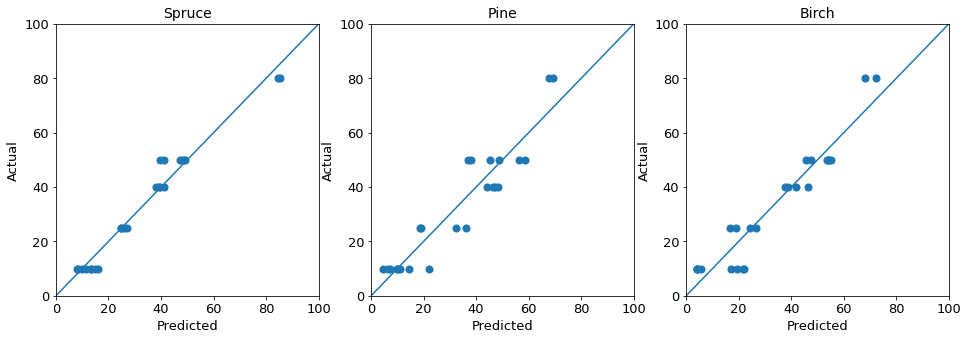

In [32]:
# Predict the output values for the inputs in the test set 
y_test_predicted = pls_sklearn.predict(X_test)

# Plot the 24 actual vs predicted values in a 1x3 subplot, include y = x line
f1 = plt.figure(figsize = (16, 5))

s3 = f1.add_subplot(131)
plt.scatter(y_test_predicted[:,0], y_test['Spruce'], s = 50)
plt.plot([0, 100], [0, 100])
plt.title('Spruce', fontsize = 14)
plt.xlabel('Predicted', fontsize = 13)
plt.ylabel('Actual', fontsize = 13)
plt.tick_params(labelsize = 13)
plt.xlim([0, 100])
plt.ylim([0, 100])

s4 = f1.add_subplot(132)
plt.scatter(y_test_predicted[:,1], y_test['Pine'], s = 50)
plt.plot([0, 100], [0, 100])
plt.title('Pine', fontsize = 14)
plt.xlabel('Predicted', fontsize = 13)
plt.ylabel('Actual', fontsize = 13)
plt.tick_params(labelsize = 13)
plt.xlim([0, 100])
plt.ylim([0, 100])

s5 = f1.add_subplot(133)
plt.scatter(y_test_predicted[:,2], y_test['Birch'], s = 50)
plt.plot([0, 100], [0, 100])
plt.title('Birch', fontsize = 14)
plt.xlabel('Predicted', fontsize = 13)
plt.ylabel('Actual', fontsize = 13)
plt.tick_params(labelsize = 13)
plt.xlim([0, 100])
plt.ylim([0, 100])
